# Comparing the 3 country with the best scores and the 3 country with the worst scores.

Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Csv reading

In [ ]:
data = pd.read_csv('/content/pisa_data.csv')

In [ ]:
data.head()

,CNTSCHID,LANGTEST,SC001Q01TA,SC013Q01TA,SC016Q01TA,SC016Q02TA,SC016Q03TA,SC016Q04TA,SC017Q01NA,SC017Q02NA,SC017Q03NA,SC017Q04NA,SC017Q05NA,SC017Q06NA,SC017Q07NA,SC017Q08NA,SC161Q01SA,SC161Q02SA,SC161Q03SA,SC161Q04SA,SC161Q05SA,SC162Q01SA,SC155Q01HA,SC155Q02HA,SC155Q03HA,SC155Q04HA,SC155Q05HA,SC155Q06HA,SC155Q07HA,SC155Q08HA,SC155Q09HA,SC155Q10HA,SC155Q11HA,SC156Q01HA,SC156Q02HA,SC156Q03HA,SC156Q04HA,SC156Q05HA,SC156Q06HA,SC156Q07HA,...,SC053Q16IA,SC053D11TA,SC150Q01IA,SC150Q02IA,SC150Q03IA,SC150Q04IA,SC150Q05IA,SC164Q01HA,SC064Q01TA,SC064Q02TA,SC064Q03TA,SC064Q04NA,SC152Q01HA,SC160Q01WA,SC052Q01NA,SC052Q02NA,SC052Q03HA,PRIVATESCH,SCHLTYPE,STRATIO,SCHSIZE,RATCMP1,RATCMP2,TOTAT,PROATCE,PROAT5AB,PROAT5AM,PROAT6,CLSIZE,CREACTIV,EDUSHORT,STAFFSHORT,STUBEHA,TEACHBEHA,SCMCEG,W_SCHGRNRABWT,W_FSTUWT_SCH_SUM,SENWT,Country,Score
0,800002,140.0,1.0,1.0,95.0,0.0,5.0,0.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,3.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,3.0,3.0,2.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,8002,2.0,2.0,2.0,2.0,2.0,0.0,70.0,70.0,100.0,0.0,2.0,NaN,2.0,2.0,2.0,public,3.0,NaN,NaN,NaN,0.0000,26.0,0.0000,0.0000,0.1154,0.0,18.0,1.0,1.2478,-1.4551,-1.1797,-2.0409,-1.0391,7.98891,115.10603,24.81933,Albania,419.7
1,800003,140.0,1.0,1.0,NaN,NaN,100.0,NaN,1.0,1.0,1.0,1.0,2.0,3.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,NaN,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,1.0,2.0,3.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,...,2.0,8002,1.0,2.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,2.0,2.0,public,3.0,NaN,NaN,NaN,NaN,6.0,1.0000,0.3333,0.3333,0.0,13.0,1.0,0.6221,-1.4551,2.1196,2.5150,-1.0542,6.50492,26.01970,20.20900,Albania,419.7
2,800004,140.0,1.0,1.0,100.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,3.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,3.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,...,2.0,8002,1.0,1.0,1.0,1.0,1.0,1.0,62.0,80.0,60.0,90.0,1.0,1.0,1.0,1.0,1.0,public,3.0,9.7619,205.0,0.0000,NaN,21.0,1.0000,0.5238,0.4762,0.0,18.0,2.0,0.4591,-1.4551,-0.6199,-0.4415,0.9042,6.64198,99.62974,20.63480,Albania,419.7
3,800005,140.0,2.0,1.0,100.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,4.0,3.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,...,2.0,8001,2.0,2.0,2.0,2.0,2.0,1.0,65.0,60.0,58.0,55.0,1.0,3.0,2.0,1.0,1.0,public,3.0,NaN,NaN,NaN,0.3333,34.5,0.6087,0.3623,0.6377,0.0,23.0,1.0,1.3065,1.2432,-0.2682,-0.0452,-1.5648,5.93762,66.50133,18.44654,Albania,419.7
4,800006,140.0,2.0,1.0,100.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,4.0,2.0,2.0,2.0,4.0,3.0,4.0,1.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,8001,2.0,2.0,2.0,2.0,2.0,NaN,97.0,97.0,99.0,2.0,1.0,3.0,2.0,2.0,1.0,public,3.0,18.0000,315.0,0.0256,1.0000,17.5,1.0000,0.0000,0.1714,0.0,38.0,3.0,-0.2376,-1.4551,-1.3196,-2.0409,0.9042,14.61508,277.68645,45.40500,Albania,419.7


In [ ]:
data.shape

(22560, 188)

I took the average of a few features and grouped our data by country.

In [ ]:
sub = data.groupby(['Country'])[['EDUSHORT','STAFFSHORT',	'STUBEHA'	,'TEACHBEHA','Score']].mean()

In [ ]:
sub.head()

,EDUSHORT,STAFFSHORT,STUBEHA,TEACHBEHA,Score
Country,,,,,
Albania,0.398417,-0.624170,-1.210347,-1.006065,419.7
Argentina,0.330759,-0.055103,0.190991,0.472453,395.0
Australia,-0.476194,-0.321211,0.095895,0.337539,499.0
Austria,-0.159980,-0.159993,0.096260,-0.157349,491.0
B-S-J-Z (China),-0.277076,0.455201,-0.023369,0.531951,578.7


Finding the 3 country with the best scores and the 3 country with the worst scores.

In [ ]:
best_3_scores = sub.nlargest(3,'Score')

worst_3_scores = sub.nsmallest(3,'Score')

In [ ]:
best_3_scores

,EDUSHORT,STAFFSHORT,STUBEHA,TEACHBEHA,Score
Country,,,,,
B-S-J-Z (China),-0.277076,0.455201,-0.023369,0.531951,578.7
Singapore,-1.067077,-0.698113,-0.579986,0.066109,556.3
Macao,-0.032382,0.292004,-0.545424,0.099796,542.3


In [ ]:
worst_3_scores

,EDUSHORT,STAFFSHORT,STUBEHA,TEACHBEHA,Score
Country,,,,,
Dominican Republic,0.410265,0.031912,-0.034157,0.029178,334.3
Philippines,0.706348,-0.247558,0.268603,-0.082376,350.0
Kosovo,1.191400,-0.188271,0.131285,0.193900,361.3


In [ ]:
best_3_scores = best_3_scores.reset_index()

In [ ]:
worst_3_scores = worst_3_scores.reset_index()

I melted the data so I could visualize multiple features an compare them with barplot.

In [ ]:
best = pd.melt(best_3_scores,id_vars= ['Country'] ,value_vars=['EDUSHORT','STAFFSHORT',	'STUBEHA'	,'TEACHBEHA'])

In [ ]:
best

,Country,variable,value
0,B-S-J-Z (China),EDUSHORT,-0.277076
1,Singapore,EDUSHORT,-1.067077
2,Macao,EDUSHORT,-0.032382
3,B-S-J-Z (China),STAFFSHORT,0.455201
4,Singapore,STAFFSHORT,-0.698113
5,Macao,STAFFSHORT,0.292004
6,B-S-J-Z (China),STUBEHA,-0.023369
7,Singapore,STUBEHA,-0.579986
8,Macao,STUBEHA,-0.545424
9,B-S-J-Z (China),TEACHBEHA,0.531951


In [ ]:
worst = pd.melt(worst_3_scores,id_vars= ['Country'] ,value_vars=['EDUSHORT','STAFFSHORT',	'STUBEHA'	,'TEACHBEHA'])

In [ ]:
worst

,Country,variable,value
0,Dominican Republic,EDUSHORT,0.410265
1,Philippines,EDUSHORT,0.706348
2,Kosovo,EDUSHORT,1.191400
3,Dominican Republic,STAFFSHORT,0.031912
4,Philippines,STAFFSHORT,-0.247558
5,Kosovo,STAFFSHORT,-0.188271
6,Dominican Republic,STUBEHA,-0.034157
7,Philippines,STUBEHA,0.268603
8,Kosovo,STUBEHA,0.131285
9,Dominican Republic,TEACHBEHA,0.029178


Visualization

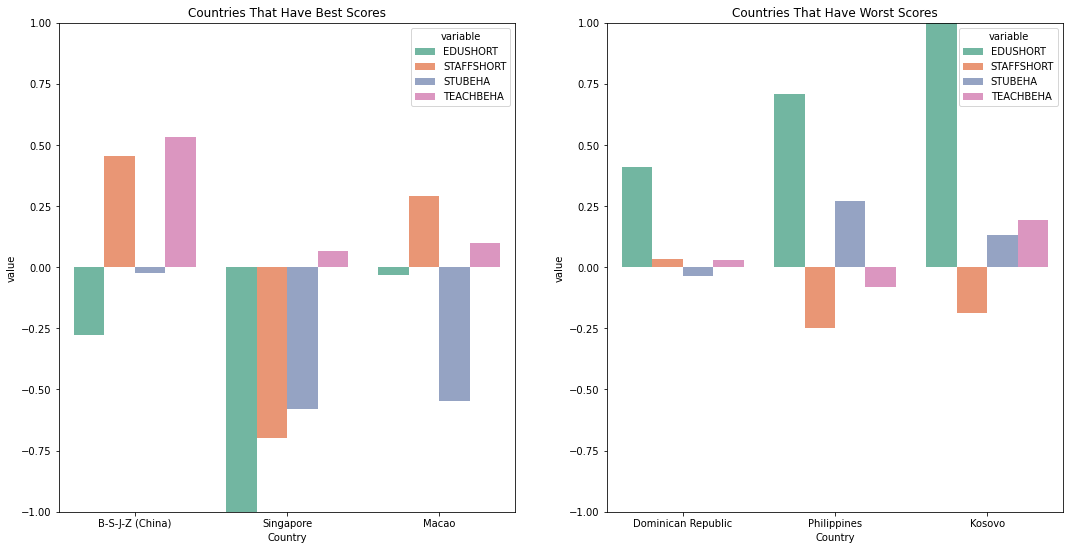

In [ ]:
plt.figure(figsize = (18,9))
plt.subplot(1,2,1)
sns.barplot(x='Country', y='value', hue='variable', data= best,palette = 'Set2')
plt.title("Countries That Have Best Scores")
plt.ylim(-1,1)


plt.subplot(1,2,2)
sns.barplot(x='Country', y='value', hue='variable', data= worst,palette = 'Set2')
plt.title("Countries That Have Worst Scores")
plt.ylim(-1,1)
plt.show()
